In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [72]:
data = pd.read_csv('results/realvsfake-epochs-65-95.csv')

In [73]:
data

,APath,BPath,answer,correct
0,real/3387.jpg,fake/epoch90/248.jpg,A,True
1,fake/epoch70/335.jpg,real/2333.jpg,B,True
2,fake/epoch65/57.jpg,real/3044.jpg,B,True
3,real/441.jpg,real/7701.jpg,A,False
4,real/6858.jpg,fake/epoch70/907.jpg,A,True
...,...,...,...,...
1465,real/366.jpg,fake/epoch70/226.jpg,A,True
1466,real/1617.jpg,fake/epoch75/93.jpg,A,True
1467,real/1339.jpg,fake/epoch65/971.jpg,A,True
1468,real/3004.jpg,real/2205.jpg,B,False


In [74]:
fail_answers = data[data['correct'] == False]
fail_answers.reset_index(drop=True, inplace=True)

In [75]:
fail_both = fail_answers[fail_answers['APath'].str.contains("real", case=False)]
fail_both = fail_both[fail_both['BPath'].str.contains("real", case=False)]
fail_both.reset_index(drop=True, inplace=True)
fail_both

,APath,BPath,answer,correct
0,real/441.jpg,real/7701.jpg,A,False
1,real/6526.jpg,real/4666.jpg,A,False
2,real/2640.jpg,real/568.jpg,A,False
3,real/7705.jpg,real/6817.jpg,A,False
4,real/3280.jpg,real/42.jpg,A,False
...,...,...,...,...
222,real/1248.jpg,real/2099.jpg,B,False
223,real/6045.jpg,real/8070.jpg,A,False
224,real/5016.jpg,real/925.jpg,B,False
225,real/4380.jpg,real/3547.jpg,B,False


In [76]:
fail_A = fail_answers[fail_answers['APath'].str.contains("fake", case=False)]
fail_A.reset_index(drop=True, inplace=True)

fail_B = fail_answers[fail_answers['BPath'].str.contains("fake", case=False)]
fail_answers.reset_index(drop=True, inplace=True)

fail_AB = pd.concat([fail_A, fail_B])
fail_AB.reset_index(drop=True, inplace=True)
fail_AB

,APath,BPath,answer,correct
0,fake/epoch90/879.jpg,real/6833.jpg,A,False
1,fake/epoch65/562.jpg,real/1435.jpg,both,False
2,fake/epoch90/323.jpg,real/8148.jpg,both,False
3,fake/epoch70/431.jpg,real/2003.jpg,A,False
4,fake/epoch80/935.jpg,real/5053.jpg,both,False
...,...,...,...,...
152,real/3540.jpg,fake/epoch85/752.jpg,B,False
153,real/3589.jpg,fake/epoch90/745.jpg,B,False
154,real/2247.jpg,fake/epoch75/796.jpg,B,False
155,real/630.jpg,fake/epoch85/866.jpg,both,False


In [77]:
correct_answers = data[data['correct']]
correct_answers

,APath,BPath,answer,correct
0,real/3387.jpg,fake/epoch90/248.jpg,A,True
1,fake/epoch70/335.jpg,real/2333.jpg,B,True
2,fake/epoch65/57.jpg,real/3044.jpg,B,True
4,real/6858.jpg,fake/epoch70/907.jpg,A,True
5,real/6796.jpg,fake/epoch80/663.jpg,A,True
...,...,...,...,...
1464,fake/epoch75/22.jpg,real/4512.jpg,B,True
1465,real/366.jpg,fake/epoch70/226.jpg,A,True
1466,real/1617.jpg,fake/epoch75/93.jpg,A,True
1467,real/1339.jpg,fake/epoch65/971.jpg,A,True


In [78]:
correct_both = correct_answers[correct_answers['APath'].str.contains("real", case=False)]
correct_both = correct_both[correct_both['BPath'].str.contains("real", case=False)]
correct_both.reset_index(drop=True, inplace=True)
correct_both

,APath,BPath,answer,correct
0,real/5224.jpg,real/5799.jpg,both,True
1,real/4382.jpg,real/6355.jpg,both,True
2,real/5586.jpg,real/2733.jpg,both,True
3,real/3516.jpg,real/6616.jpg,both,True
4,real/3480.jpg,real/4770.jpg,both,True
...,...,...,...,...
282,real/7096.jpg,real/1841.jpg,both,True
283,real/2753.jpg,real/8163.jpg,both,True
284,real/1474.jpg,real/161.jpg,both,True
285,real/6011.jpg,real/2855.jpg,both,True


In [79]:
correct_A = correct_answers[correct_answers['APath'].str.contains("fake", case=False)]
correct_A.reset_index(drop=True, inplace=True)

correct_B = correct_answers[correct_answers['BPath'].str.contains("fake", case=False)]
correct_answers.reset_index(drop=True, inplace=True)

correct_AB = pd.concat([correct_A, correct_B])
correct_AB.reset_index(drop=True, inplace=True)
correct_AB

,APath,BPath,answer,correct
0,fake/epoch70/335.jpg,real/2333.jpg,B,True
1,fake/epoch65/57.jpg,real/3044.jpg,B,True
2,fake/epoch65/575.jpg,real/5784.jpg,B,True
3,fake/epoch75/917.jpg,real/8033.jpg,B,True
4,fake/epoch70/566.jpg,real/7537.jpg,B,True
...,...,...,...,...
794,real/4810.jpg,fake/epoch75/569.jpg,A,True
795,real/366.jpg,fake/epoch70/226.jpg,A,True
796,real/1617.jpg,fake/epoch75/93.jpg,A,True
797,real/1339.jpg,fake/epoch65/971.jpg,A,True


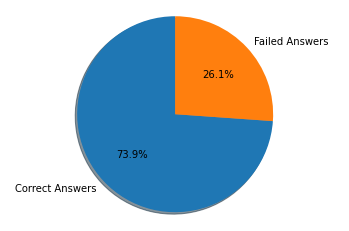

In [80]:
labels = 'Correct Answers', 'Failed Answers'
sizes = [len(correct_answers), len(fail_answers)]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

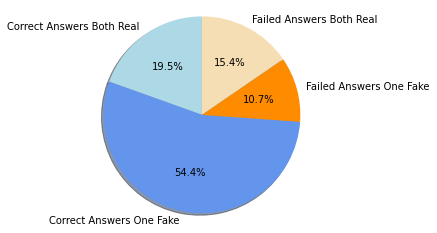

In [81]:
labels = 'Correct Answers Both Real', 'Correct Answers One Fake', 'Failed Answers One Fake', 'Failed Answers Both Real'
sizes = [len(correct_both), len(correct_AB), len(fail_AB), len(fail_both)]
colors = ['lightblue', 'cornflowerblue', 'darkorange', 'wheat']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

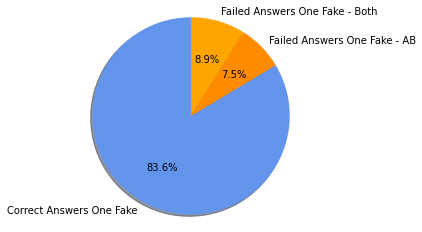

In [82]:
labels ='Correct Answers One Fake', 'Failed Answers One Fake - AB', 'Failed Answers One Fake - Both'
sizes = [len(correct_AB), len(fail_AB[fail_AB['answer'] != 'both']), len(fail_AB[fail_AB['answer'] == 'both'])]
colors = ['cornflowerblue','darkorange', 'orange']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

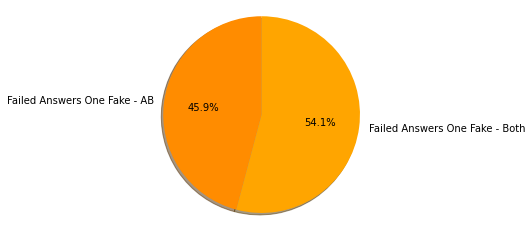

In [83]:
labels ='Failed Answers One Fake - AB', 'Failed Answers One Fake - Both'
sizes = [len(fail_AB[fail_AB['answer'] != 'both']), len(fail_AB[fail_AB['answer'] == 'both'])]
colors = ['darkorange', 'orange']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [84]:
def results_by_epoch(epoch_n):
    dfA = fail_A[fail_A['APath'].str.contains("epoch{}".format(epoch_n), case=False)]
    dfB = fail_B[fail_B['BPath'].str.contains("epoch{}".format(epoch_n), case=False)]
    return pd.concat([dfA, dfB])

25 20 25 25 31 31


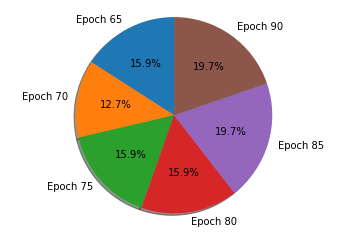

In [86]:




labels ='Epoch 65', 'Epoch 70', 'Epoch 75', 'Epoch 80', 'Epoch 85', 'Epoch 90'
sizes = [
    len(results_by_epoch(65)),
    len(results_by_epoch(70)),
    len(results_by_epoch(75)),
    len(results_by_epoch(80)),
    len(results_by_epoch(85)),
    len(results_by_epoch(90))
]
    
print(
    len(results_by_epoch(65)),
    len(results_by_epoch(70)),
    len(results_by_epoch(75)),
    len(results_by_epoch(80)),
    len(results_by_epoch(85)),
    len(results_by_epoch(90))
) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()